In [17]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

In [2]:
#import the dataset

data = pd.read_csv('LR.csv')
data.head()

,Age,Salary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [3]:
x = data.iloc[: , [0,1]].values
y = data.iloc[: , 2].values

In [23]:
# train and testing the dataset

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [24]:
# Dicision Tree

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [25]:
# confusion matrix

from sklearn.metrics import confusion_matrix
matrx = confusion_matrix(y_test, y_pred)

matrx

array([[53,  5],
       [ 3, 19]], dtype=int64)

In [26]:
# Accuracy score

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9

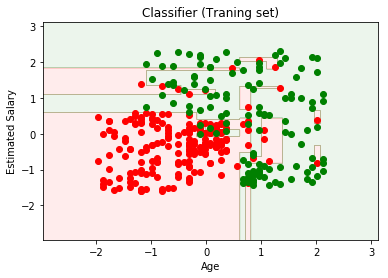

In [27]:
# visualising the result

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() +1, step = 0.01),
                    np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() +1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.075, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set  == j, 0], X_set[y_set == j,1],
               c = ListedColormap(('red','green'))(i), label = j)
    
plt.title('Classifier (Traning set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()

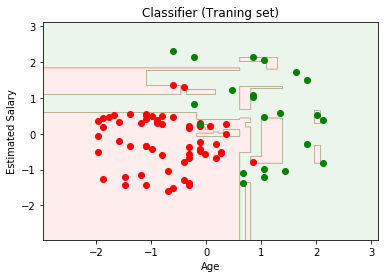

In [28]:
# visulasing the Test set

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() +1, step = 0.01),
                    np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() +1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.075, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set  == j, 0], X_set[y_set == j,1],
               c = ListedColormap(('red','green'))(i), label = j)
    
plt.title('Classifier (Traning set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()